In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_1 = pd.read_csv('../data/routes_1.txt')
df_2 = pd.read_csv('../data/routes_2.txt')

In [4]:
location_subnet_dict_1 = {}
location_subnet_dict_1 = defaultdict(lambda:0, location_subnet_dict_1)

for i in range(len(df_1)):
    location_subnet_dict_1[df_1.iloc[i]["Location"]] += 1


location_subnet_dict_2 = {}
location_subnet_dict_2 = defaultdict(lambda:0, location_subnet_dict_2)

for i in range(len(df_2)):
    location_subnet_dict_2[df_2.iloc[i]["Location"]] += 1

In [5]:
val_1 = np.array(list(location_subnet_dict_1.values()))
val_2 = np.array(list(location_subnet_dict_2.values()))

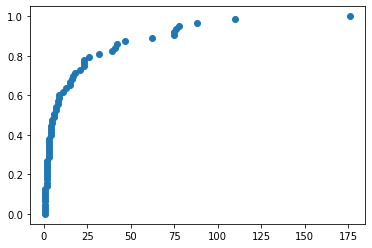

In [6]:

x= np.sort(val_1)
y = 1. * np.arange(len(val_1)) / (len(val_1) - 1)
plt.scatter(x,y)
plt.show()

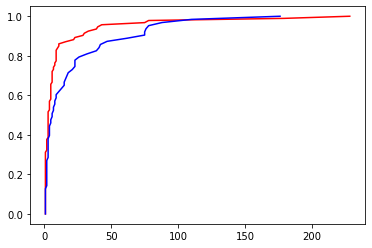

In [7]:
# sns.distplot(val_2, color = 'Blue')
x1= np.sort(val_2)
y1 = 1. * np.arange(len(val_2)) / (len(val_2) - 1)
plt.plot(x1,y1,color = 'Red')
plt.plot(x,y,color = 'Blue')
plt.show()

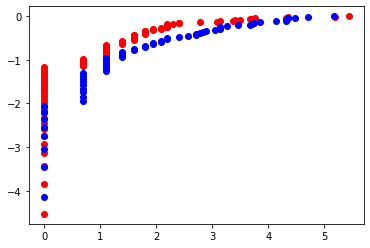

In [8]:
plt.scatter(np.log(x1),np.log(y1),color = 'Red')
plt.scatter(np.log(x),np.log(y),color = 'Blue')

64
[176 110  88  78  76  75  75  62  47  42  41  39  32  26  23  23  23  21
  18  17  16  15  15  13  11   9   9   8   8   7   7   6   6   5   5   4
   4   4   4   3   3   3   3   3   3   3   2   2   2   2   2   2   2   2
   2   1   1   1   1   1   1   1   1   1]


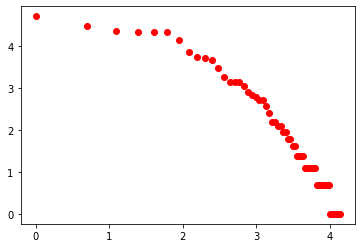

In [13]:

# m1 = np.mean(val_1)
# d1 = np.std(val_1)
# pdf1 = scipy.stats.norm.pdf(np.sort(val_1), m1, d1)
# lval_1 = np.log(np.sort(val_1))
# lpdf1 = np.log(pdf1)
pdf1 = np.sort(val_1)[::-1]
x2 = range(len(pdf1))
plt.scatter(np.log(x2),np.log(pdf1), color ='Red')
# m2 = np.mean(val_2)
# d2 = np.std(val_2)
# pdf2 = scipy.stats.norm.pdf(np.sort(val_2), m2, d2)
# lval_2 = np.log(np.sort(val_2))
# lpdf2 = np.log(pdf2)
# plt.scatter(val_2,pdf2, color ='Green')
print(len(x))
print((pdf1))



In [10]:
def neg_zipf_likelihood1(s):
    n = sum(pdf1)
    probas = val_1 ** (-s) / np.sum(np.arange(1, n+1) **(-s))
    log_likelihood = sum(np.log(probas) * val_1)
    return -log_likelihood

from scipy.optimize import minimize_scalar
s_best1 = minimize_scalar(neg_zipf_likelihood1, [0.1, 3.0] )
print(s_best1.x)

0.8894408283229888


In [11]:
def neg_zipf_likelihood2(s):
    n = sum(pdf2)
    probas = val_2 ** (-s) / np.sum(np.arange(1, n+1) **(-s))
    log_likelihood = sum(np.log(probas) * val_2)
    return -log_likelihood

from scipy.optimize import minimize_scalar
s_best2 = minimize_scalar(neg_zipf_likelihood2, [0.1, 3.0] )
print(s_best2.x)

NameError: name 'pdf2' is not defined

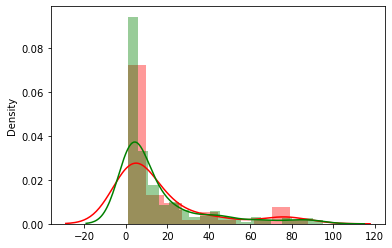

In [ ]:
zipf1 = np.random.zipf(a=1.04, size=1000)

sns.distplot(val_1[val_1<100], color = 'Red')
sns.distplot(zipf1[zipf1<100], color = 'Green')
plt.show()

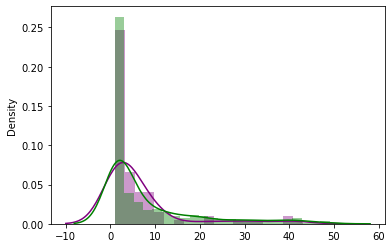

In [ ]:
zipf2 = np.random.zipf(a=1.23, size=1000)

sns.distplot(val_2[val_2<50], color = 'Purple')
sns.distplot(zipf2[zipf2<50], color = 'Green')
plt.show()